# Electricity consumption
I saved the values of my electricity meter over 3 years. This is some work around those values.

In [1]:
import csv

from datetime import datetime, timedelta
from matplotlib import pyplot, dates as mdates

In [2]:
FILE = "./electricity-2020-2022.csv"
FILE_DATE_FORMAT = "%b %d, %Y" 

In [6]:
def configure_plot(x_values, y_values, interval=30):
    pyplot.rcParams["figure.figsize"] = (20,3)

    ax = pyplot.gca()

    #format as dates
    formatter = mdates.DateFormatter("%Y/%m/%d")
    ax.xaxis.set_major_formatter(formatter)

    locator = mdates.DayLocator(interval=interval)

    #set locator
    ax.xaxis.set_major_locator(locator)


    pyplot.plot(x_values, y_values)
    pyplot.gcf().autofmt_xdate()

## Load the values from the file

In [7]:
measure_dates = []
measure_values = []
with open(FILE, newline='') as csvfile:
    next(csvfile)
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in reader:
        if len(row) < 2 or not row[0] or not row[1]:
            continue
        measure_date = row[0]
        measure_value = float(row[1])
        if measure_date:
            date_value = datetime.strptime(measure_date, FILE_DATE_FORMAT).date()
            measure_dates.append(date_value)
            measure_values.append(measure_value)

## Basic Plot of the values

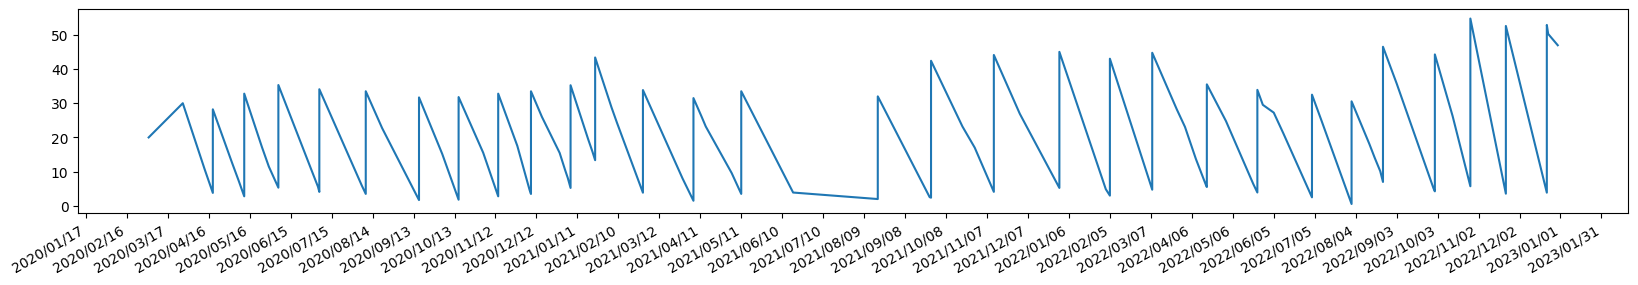

In [8]:
configure_plot(measure_dates, measure_values)

## Plot of average consumption per day

In [9]:
consumption_values = []
consumption_dates = []
prev_value = None
prev_date = None
for measure_date, measure_value in zip(measure_dates, measure_values):
    if prev_value:
        diff_value = prev_value - measure_value
        diff_date = measure_date - prev_date
        if diff_value and diff_value > 0:
            consumption_value = diff_value / diff_date.days
            for day in range(diff_date.days):
                consumption_values.append(consumption_value)
                consumption_dates.append(prev_date + timedelta(days=day))

    prev_value = measure_value
    prev_date = measure_date


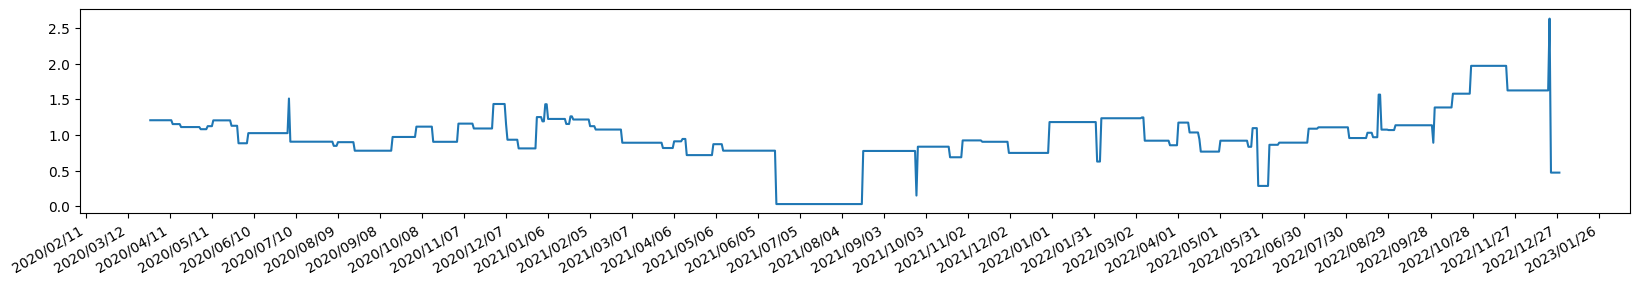

In [10]:
configure_plot(consumption_dates, consumption_values, interval=30)

## Pandas work

In [11]:
import pandas as pd

In [12]:
consumption_df = pd.DataFrame({
    'day': consumption_dates,
    'value': consumption_values
})

In [13]:
consumption_df.head(10)

,day,value
0,2020-03-28,1.205625
1,2020-03-29,1.205625
2,2020-03-30,1.205625
3,2020-03-31,1.205625
4,2020-04-01,1.205625
5,2020-04-02,1.205625
6,2020-04-03,1.205625
7,2020-04-04,1.205625
8,2020-04-05,1.205625
9,2020-04-06,1.205625


### Sanity checks

In [14]:
consumption_df.loc[consumption_df['value'].idxmax()]

day      2022-12-22
value          2.63
Name: 999, dtype: object

The maximum consumption was during the darkest month of the most expensive year. 

In [15]:
consumption_df.loc[consumption_df['value'].idxmin()]

day      2021-06-18
value      0.030645
Name: 447, dtype: object

Cheapeast day was in June.